# Predicting Bank Customers Pattern using Machine Learning

The notebook looks into using various Python-based machine learning and Data Science libraries in an attempt to build a machine learning model capable of predicting whether or not a bank customer will remain a customer of the bank based on their information and experience.

We are going to take the following approach:
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

***Create a Dictionary***

* RowNumber—corresponds to the record (row) number and   has no effect on the output.
* CustomerId—contains random values and has no effect   on customer leaving the bank.
* Surname—the surname of a customer has no impact on     their decision to leave the bank.
* CreditScore—can have an effect on customer churn,     since a customer with a higher credit score is less   likely to leave the bank.
* Geography—a customer’s location can affect their       decision to leave the bank.
* Gender—it’s interesting to explore whether gender     plays a role in a customer leaving the bank.
* Age—this is certainly relevant, since older           customers are less likely to leave their bank than     younger ones.
* Tenure—refers to the number of years that the         customer has been a client of the bank. Normally,     older clients are more loyal and less likely to       leave a bank.
* Balance—also a very good indicator of customer         churn, as people with a higher balance in their       accounts are less likely to leave the bank compared   to those with lower balances.
* NumOfProducts—refers to the number of products that   a customer has purchased through the bank.
* HasCrCard—denotes whether or not a customer has a     credit card. This column is also relevant, since       people with a credit card are less likely to leave     the bank.
* IsActiveMember—active customers are less likely to     leave the bank.
* EstimatedSalary—as with balance, people with lower     salaries are more likely to leave the bank compared   to those with higher salaries.
* Exited—whether or not the customer left the bank.
  Complain—customer has complaint or not. ***You can use this aas your target depending on what you want to use your model for***
* Satisfaction Score—Score provided by the customer     for their complaint resolution.
* Card Type—type of card hold by the customer.
* Points Earned—the points earned by the customer for   using credit card.

It's a good idea to save these to a Python dictionary or in an external file, so we can look at them later without coming back here.

Preparing the tools
At the start of any project, it's custom to see the required libraries imported in a big chunk like you can see below.

However, in practice, your projects may import libraries as you go. After you've spent a couple of hours working on your problem, you'll probably want to do some tidying up. This is where you may want to consolidate every library you've used at the top of your notebook (like the cell below).

The libraries you use will differ from project to project. But there are a few which will you'll likely take advantage of during almost every structured data project.

pandas for data analysis. NumPy for numerical operations. Matplotlib/seaborn for plotting or data visualization. Scikit-Learn for machine learning modelling and evaluation.

In [3]:
# Regular EDA and plotting libraries
import numpy as np # np is short for numpy
import pandas as pd # pandas is so commonly used, it's shortened to pd
import matplotlib.pyplot as plt
import seaborn as sns # seaborn gets shortened to sns
import xgboost as xgb

# We want our plots to appear in the notebook
%matplotlib inline 

# For Encoding
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer

# Models for Scikit-Learn
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

#  Load the Data

In [4]:
df = pd.read_csv("bank-customers-project.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [9]:
df.shape

(10000, 18)

# EDA

In [7]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [11]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0,0,3,DIAMOND,911


In [37]:
# Convert attribute names to lowercase
df.columns = df.columns.str.lower()

# Replace spaces with underscores
df.columns = df.columns.str.replace(' ', '_')

# Display the modified DataFrame
df

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,complain,satisfaction_score,card_type,point_earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   rownumber           10000 non-null  int64  
 1   customerid          10000 non-null  int64  
 2   surname             10000 non-null  object 
 3   creditscore         10000 non-null  int64  
 4   geography           10000 non-null  object 
 5   gender              10000 non-null  object 
 6   age                 10000 non-null  int64  
 7   tenure              10000 non-null  int64  
 8   balance             10000 non-null  float64
 9   numofproducts       10000 non-null  int64  
 10  hascrcard           10000 non-null  int64  
 11  isactivemember      10000 non-null  int64  
 12  estimatedsalary     10000 non-null  float64
 13  exited              10000 non-null  int64  
 14  complain            10000 non-null  int64  
 15  satisfaction_score  10000 non-null  int64  
 16  card_

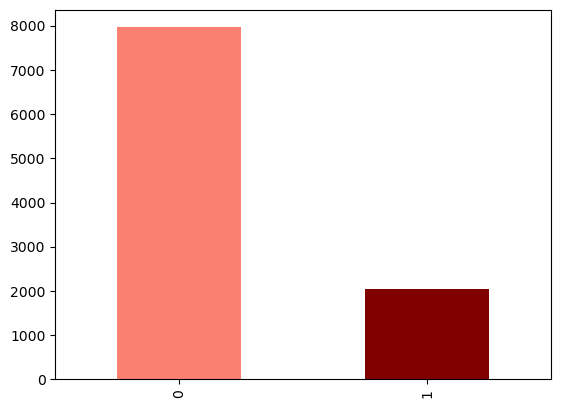

In [39]:
df["exited"].value_counts().plot(kind='bar', color=["salmon", "maroon"]);

In [40]:
# Are they any missing values?
df.isna().sum()

rownumber             0
customerid            0
surname               0
creditscore           0
geography             0
gender                0
age                   0
tenure                0
balance               0
numofproducts         0
hascrcard             0
isactivemember        0
estimatedsalary       0
exited                0
complain              0
satisfaction_score    0
card_type             0
point_earned          0
dtype: int64

In [41]:
df.describe()

,rownumber,customerid,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,complain,satisfaction_score,point_earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [42]:
pd.crosstab(df.exited, df.gender)

gender,Female,Male
exited,,
0,3404,4558
1,1139,899


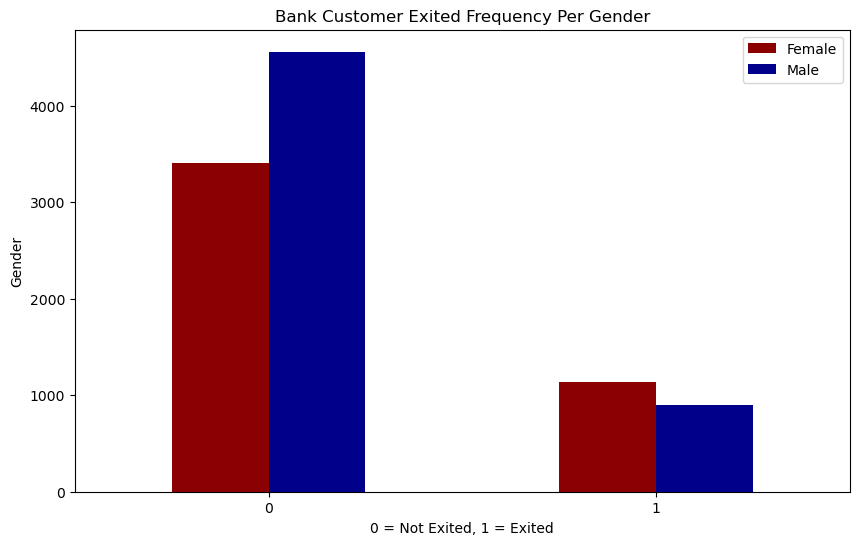

In [43]:
# Let us create a plot of crosstab
pd.crosstab(df.exited, df.gender).plot(kind="bar",
                                       figsize=(10, 6),
                                       color=["darkred", "darkblue"])

plt.title("Bank Customer Exited Frequency Per Gender")
plt.xlabel("0 = Not Exited, 1 = Exited")
plt.ylabel("Gender")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

# Age vs Estimated Salary for Exited Disease

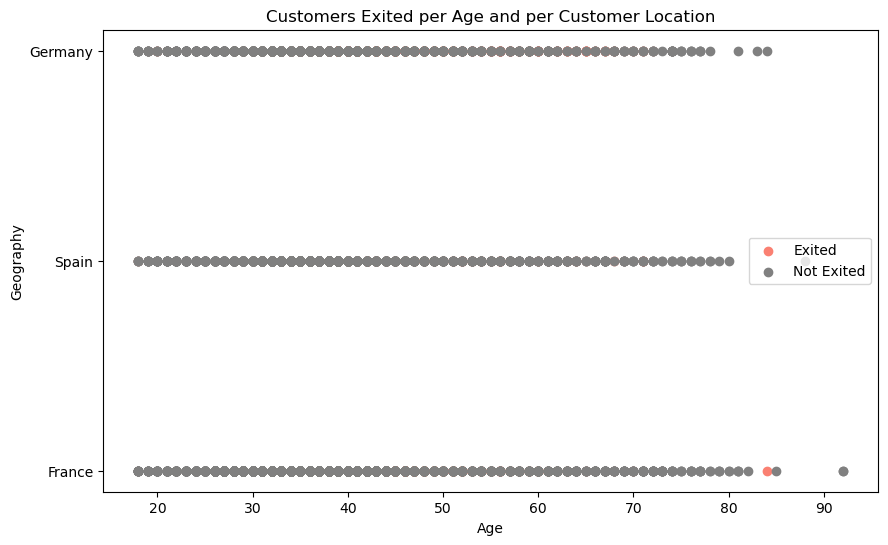

In [44]:
# Create another figure
plt.figure(figsize=(10, 6))

# Sctter with positive examples
plt.scatter(df.age[df.exited==1],
            df.geography[df.exited==1],
            color="salmon")

# Scatter with negative examples
plt.scatter(df.age[df.exited==0],
            df.geography[df.exited==0],
            color="gray")

# Add some features
plt.title("Customers Exited per Age and per Customer Location")
plt.xlabel("Age")
plt.ylabel("Geography")
plt.legend(["Exited", "Not Exited"])
plt.xticks(rotation=0);

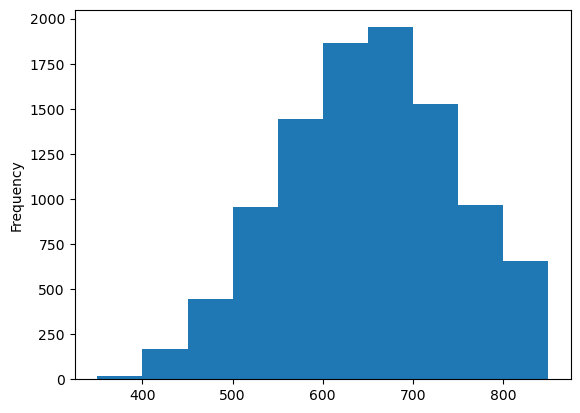

In [34]:
# Check the distribution of age column with a histogram
df.CreditScore.plot.hist();

# Exited Customers vs Card Type

In [46]:
pd.crosstab(df.card_type, df.exited)

exited,0,1
card_type,,
DIAMOND,1961,546
GOLD,2020,482
PLATINUM,1987,508
SILVER,1994,502


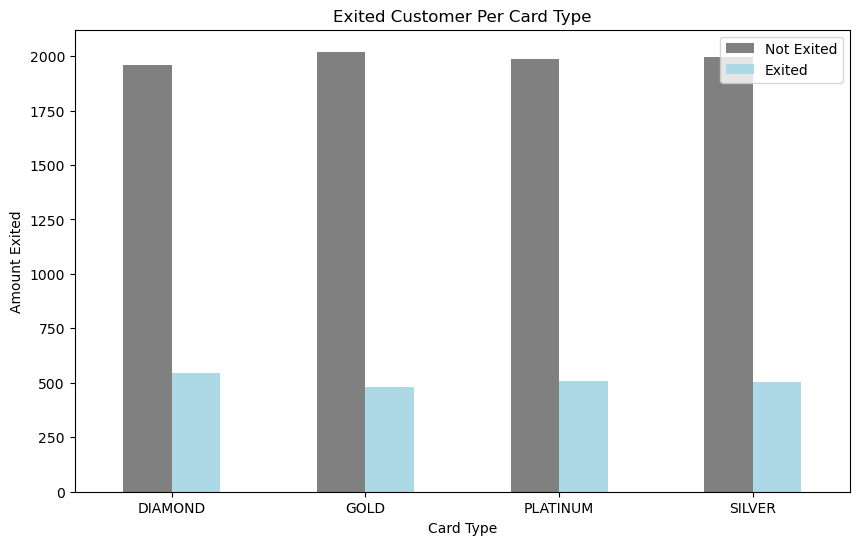

In [49]:
# Make the crosstab more visual
pd.crosstab(df.card_type, df.exited).plot(kind="bar",
                                          figsize=(10, 6),
                                          color=["gray", "lightblue"])

# Add some communication
plt.title("Exited Customer Per Card Type")
plt.xlabel("Card Type")
plt.ylabel("Amount Exited")
plt.legend(["Not Exited", "Exited"])
plt.xticks(rotation=0);

# Exited Customers Frequency Per Satisfactory

In [48]:
pd.crosstab(df.satisfaction_score, df.exited)

exited,0,1
satisfaction_score,,
1,1545,387
2,1575,439
3,1641,401
4,1594,414
5,1607,397


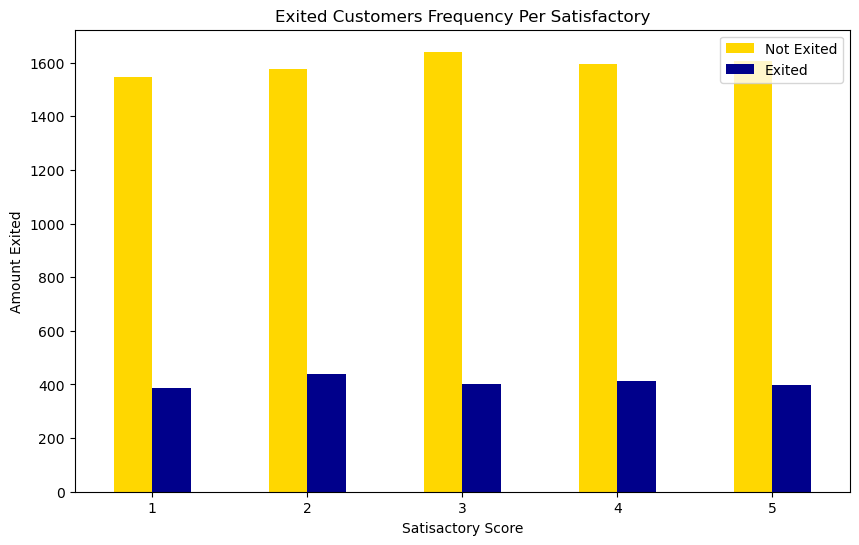

In [50]:
# Make the crosstab more visual
pd.crosstab(df.satisfaction_score, df.exited).plot(kind="bar",
                                          figsize=(10, 6),
                                          color=["gold", "darkblue"])
# Add some communication
plt.title("Exited Customers Frequency Per Satisfactory")
plt.xlabel("Satisactory Score")
plt.ylabel("Amount Exited")
plt.legend(["Not Exited", "Exited"])
plt.xticks(rotation=0);

In [51]:
df.corr()

C:\Users\Daniel\AppData\Local\Temp\ipykernel_28880\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,rownumber,customerid,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,complain,satisfaction_score,point_earned
rownumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016140,-0.016957,0.009289,0.002360
customerid,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006203,-0.007293,-0.000865,-0.013076
creditscore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.026771,-0.027048,-0.012599,0.000077
age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285296,0.283530,-0.000876,0.002222
tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.013656,-0.013047,0.008663,-0.010196
balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118577,0.119124,-0.002588,0.014608
numofproducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047611,-0.046357,-0.011394,-0.015330
hascrcard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.006976,-0.007095,-0.000212,-0.011041
isactivemember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156356,-0.154741,0.010236,-0.004983
estimatedsalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012490,0.012494,-0.013747,-0.001515


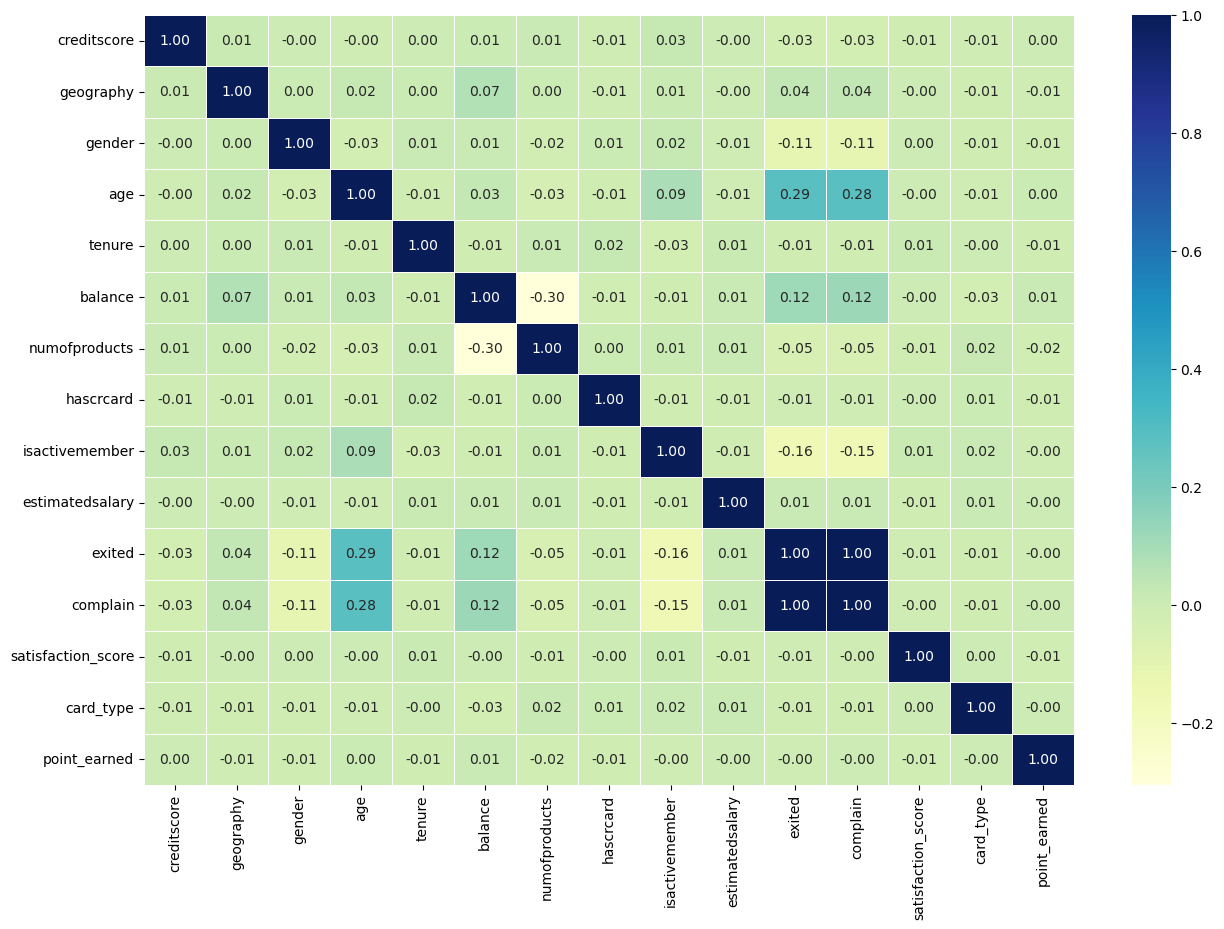

In [67]:
# Let's make our correlation matrix presentable
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidth=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

In [ ]:
# Let us drop rows that are not relevant
df.drop(columns=["rownumber", "customerid", "surname"], inplace=True)

In [59]:
df.head()

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,complain,satisfaction_score,card_type,point_earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [60]:
# Now let us encode the categorical columns int o numerical.
df_ct = ["geography", "gender", "card_type"]

enc = OrdinalEncoder()
df[df_ct] = enc.fit_transform(df[df_ct])

In [61]:
df.head()

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,complain,satisfaction_score,card_type,point_earned
0,619,0.0,0.0,42,2,0.00,1,1,1,101348.88,1,1,2,0.0,464
1,608,2.0,0.0,41,1,83807.86,1,0,1,112542.58,0,1,3,0.0,456
2,502,0.0,0.0,42,8,159660.80,3,1,0,113931.57,1,1,3,0.0,377
3,699,0.0,0.0,39,1,0.00,2,0,0,93826.63,0,0,5,1.0,350
4,850,2.0,0.0,43,2,125510.82,1,1,1,79084.10,0,0,5,1.0,425


In [62]:
# Convert multiple categorical columns represented as floats to integers
flt_to_int = ["geography", "gender", "card_type"]
df[flt_to_int] = df[flt_to_int].astype(int)

In [65]:
df.head()

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,complain,satisfaction_score,card_type,point_earned
0,619,0,0,42,2,0.00,1,1,1,101348.88,1,1,2,0,464
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0,1,3,0,456
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1,1,3,0,377
3,699,0,0,39,1,0.00,2,0,0,93826.63,0,0,5,1,350
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0,0,5,1,425


# Modelling

* Train, Test, Split

In [66]:
# Split
X = df.drop("exited", axis=1)
y = df["exited"]

# Import Random Seed
np.random.seed(42)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Now we have got our data split into training and test sets, it is time to build a Machine learning model.

We will train it (find the patterns) on the tarining set.

And we will test it(use the patterns) on the test set.

We are going to try 2 Machine learning models:

1. Logistic Regression.
2. XGBoost Classifier.

In [68]:
# Put models in a dictionary, this helps to avoid going over all the models one by one in fitting and all.
models = {"Logistic Regression": LogisticRegression(),
          "XG Boost": xgb.XGBClassifier()}

# Create a function tpo fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates machine learning models.
    models : a dictionary of different Scikit-learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : testing labels
    """
    # Set random seed
    np.random.seed(42)
    
    # Make a dictionary to keep model scores
    model_scores = {}
    
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [69]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'Logistic Regression': 0.7985, 'XG Boost': 0.999}

# Model Comparison

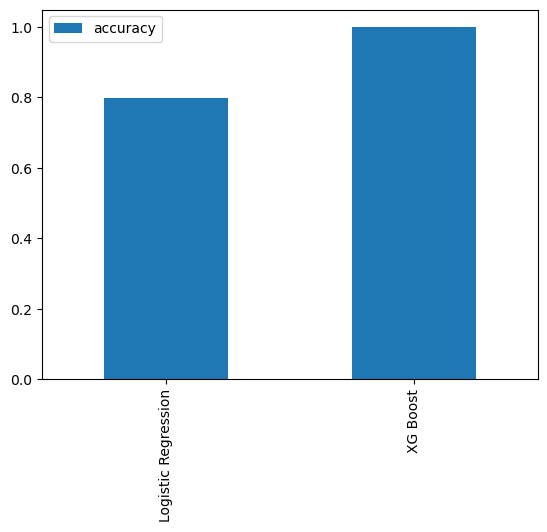

In [70]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();  # 'T" is for transpose

Now we have got a baseline model and we know a models first prediction are not what we should always base our next steps on. What should we do?

Lets looks at the following:

Hyperparameter Tuning
Feature importance
Then these ones below is because it is a classification problem. It differs in regression problems.

Confusion matrix
Cross-validation
Precision
Recall
F1 score
Classification report
ROC curve
Area under the curve (AUC)

# Hyperparameter Tuning for Linear Regression only with RandomSearchCV

In [74]:
# Create a hyperparameter grid for Logistic Regression
log_reg_grid = {"C": np.logspace(-5, 5, 25),
                "solver": ["liblinear"],
                "fit_intercept": [True, False],
                "penalty": ['l1', 'l2']}

Now we have got hyperparameters grids setup for each of our models, lets tune them using RandomizedSearcCV

In [75]:
# Tune Logistic Regression
np.random.seed(42)

# Setup RandomSearchCV hyperparameter for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=30,
                                verbose=True)

# Fit RandomSearchCV hyperpaarameter model for Logisticregression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=30,
                   param_distributions={'C': array([1.00000000e-05, 2.61015722e-05, 6.81292069e-05, 1.77827941e-04,
       4.64158883e-04, 1.21152766e-03, 3.16227766e-03, 8.25404185e-03,
       2.15443469e-02, 5.62341325e-02, 1.46779927e-01, 3.83118685e-01,
       1.00000000e+00, 2.61015722e+00, 6.81292069e+00, 1.77827941e+01,
       4.64158883e+01, 1.21152766e+02, 3.16227766e+02, 8.25404185e+02,
       2.15443469e+03, 5.62341325e+03, 1.46779927e+04, 3.83118685e+04,
       1.00000000e+05]),
                                        'fit_intercept': [True, False],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear']},
                   verbose=True)

In [76]:
# Find the best hyperparameters
rs_log_reg.best_params_

{'solver': 'liblinear',
 'penalty': 'l1',
 'fit_intercept': False,
 'C': 121.15276586285901}

In [77]:
rs_log_reg.score(X_test, y_test)

0.999

# Since we have achieved an amazing score on both models, let us proceed to Evaluating the metrics.

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

... and it would be great if the cross-validation was used where possible.

To make comaparisons and evaluate our model, first we need to make predictions.

In [79]:
# Make Predictions with tuned model
y_preds = rs_log_reg.predict(X_test)

In [80]:
y_preds

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [86]:
# Access the specific model you want to use for predictions
xg_model = models["XG Boost"]  # Replace 'xgboost' with the appropriate key

# Make Predictions with tuned model
y_preds1 = xg_model.predict(X_test)

In [87]:
y_preds1

array([0, 0, 0, ..., 1, 1, 1])

In [92]:
y_test

6252    0
4684    0
1731    0
4742    0
4521    0
       ..
6412    1
8285    0
7853    1
1095    1
6929    1
Name: exited, Length: 2000, dtype: int64

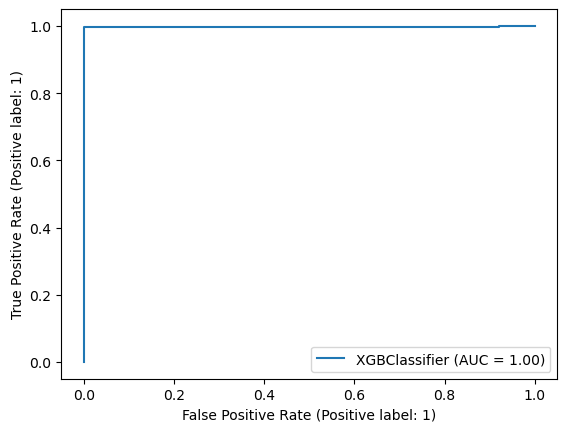

In [93]:
# Plot ROC Curve and Calculate AUC metric
RocCurveDisplay.from_estimator(xg_model, X_test, y_test);

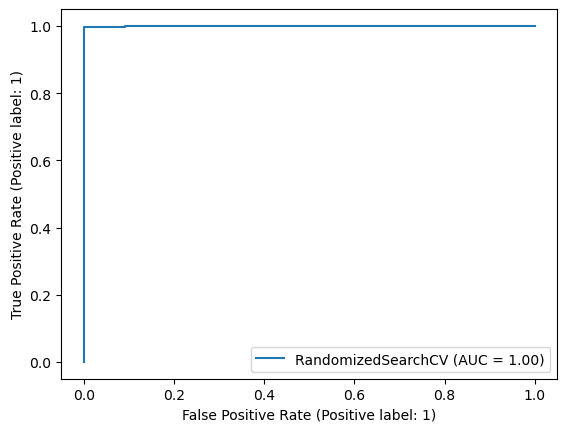

In [95]:
# Plot ROC Curve and Calculate AUC metric
RocCurveDisplay.from_estimator(rs_log_reg, X_test, y_test);

In [96]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[1606    1]
 [   1  392]]


In [97]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds1))

[[1606    1]
 [   1  392]]


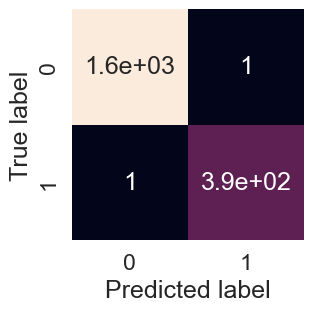

In [98]:
# For Logistic Regression

sns.set(font_scale=1.5) # Increase font size
 
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
    
plot_conf_mat(y_test, y_preds)

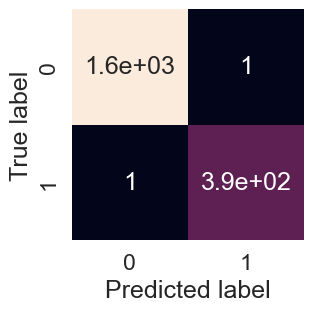

In [99]:
# XGBoost

sns.set(font_scale=1.5) # Increase font size
 
def plot_conf_mat(y_test, y_preds1):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds1),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
    
plot_conf_mat(y_test, y_preds1)

Now we have got a ROC curve, an AUC metric, and a Confusion matrix, lets get a clasification report as well as cross-validation, precision, recall and f1-score

In [100]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [101]:
print(classification_report(y_test, y_preds1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



# Feature Importnace

It is another way of asking which features contributed most to the outcomes of the model and how did they contibute.

Fiding feature importance is different for each machine learning model. One way to find feature importance is to search for "(MODEL NAME) feature importance".

Let us find the feature importance of our LogisticRegression model and XGBoost.

In [106]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=121.15276586285901,
                         solver="liblinear",
                         penalty= "l1",
                         fit_intercept= False)

clf.fit(X_train, y_train);

In [107]:
# Check coef_ # stands for "coefficient".
clf.coef_

array([[-5.70717065e-03, -7.06482097e-02, -5.44863631e-01,
         5.54649017e-02, -8.91583421e-02, -3.95554357e-06,
        -4.86683167e-01, -5.08811536e-01, -1.49910799e+00,
        -4.92074497e-06,  1.39316137e+01, -3.33788168e-01,
        -6.74008117e-02, -3.37520016e-03]])

In [108]:
# Match coef's of features to columns
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'creditscore': -0.005707170652263942,
 'geography': -0.07064820968644647,
 'gender': -0.5448636310562552,
 'age': 0.05546490172359503,
 'tenure': -0.08915834205365118,
 'balance': -3.955543569900994e-06,
 'numofproducts': -0.486683167115894,
 'hascrcard': -0.5088115360892889,
 'isactivemember': -1.4991079915740593,
 'estimatedsalary': -4.920744967746742e-06,
 'exited': 13.931613673518234,
 'complain': -0.3337881680882735,
 'satisfaction_score': -0.06740081170642079,
 'card_type': -0.0033752001573399072}

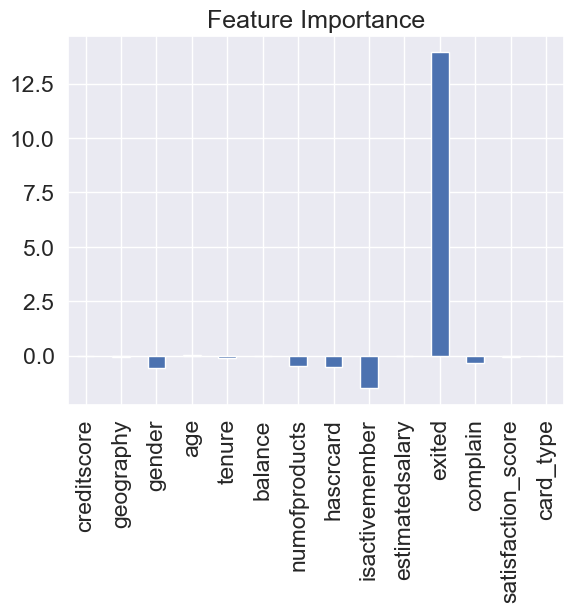

In [109]:
# Visualize feature Importance
feature_df = pd.DataFrame(features_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);